# Lecture 03 – Visualizing Categorical Variables

## Data 6, Visualizations Module

In [1]:
from datascience import * # datascience has plotting features built in
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

import warnings
warnings.filterwarnings('ignore')
#Table.interactive_plots() 

## Bar Charts

Bar charts are helpful for visualizing the relationship between a categorical variable and a numerical variable, or for visualizing the distribution of a categorical variable. For example, we can visualize the number of cookies we have of each type (at our imaginary cookie store).

In [2]:
cookies = Table()
cookies = cookies.with_columns(
    "Cookie", make_array("chocolate chip", "red velvet","oatmeal raisin",  "sugar cookies", "peanut butter"),
    "Count", make_array(15, 15, 10, 10, 5)
)
cookies

Cookie,Count
chocolate chip,15
red velvet,15
oatmeal raisin,10
sugar cookies,10
peanut butter,5


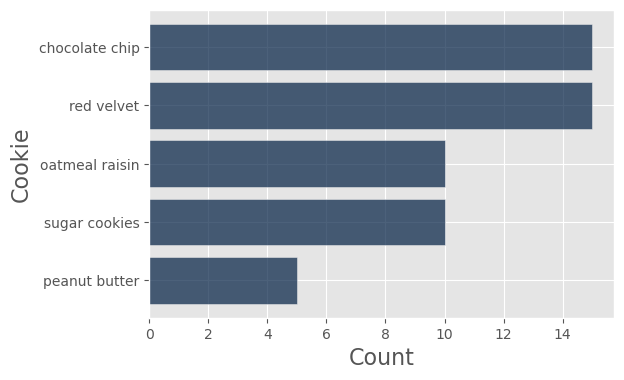

In [3]:
cookies.barh('Cookie')

### Example 1: Top 10 Songs on Spotify

The streaming service Spotify has a lot of [data](https://spotifycharts.com/regional) we can work with. 

While the spotify song charts are nice sometimes we like to gather additional data to spice up our analysis such as in this case the year a song was released or the key of the song. Luckily there is publicly available data on [kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023?resource=download) that provides just this. However, since we're working with Kaggle data it's always important to consider the limitations (i.e. the dataset contains 952 of the most famous songs from 2023, how did the author of the dataset define famous?
)

In [4]:
top_10_simple = Table.read_table('data/spotify-2023-top-10.csv').select("track_name", "streams")
top_10_simple

track_name,streams
Blinding Lights,3703895074
Shape of You,3562543890
Someone You Loved,2887241814
Dance Monkey,2864791672
Sunflower - Spider-Man: Into the Spider-Verse,2808096550
One Dance,2713922350
STAY (with Justin Bieber),2665343922
Believer,2594040133
Closer,2591224264
Starboy,2565529693


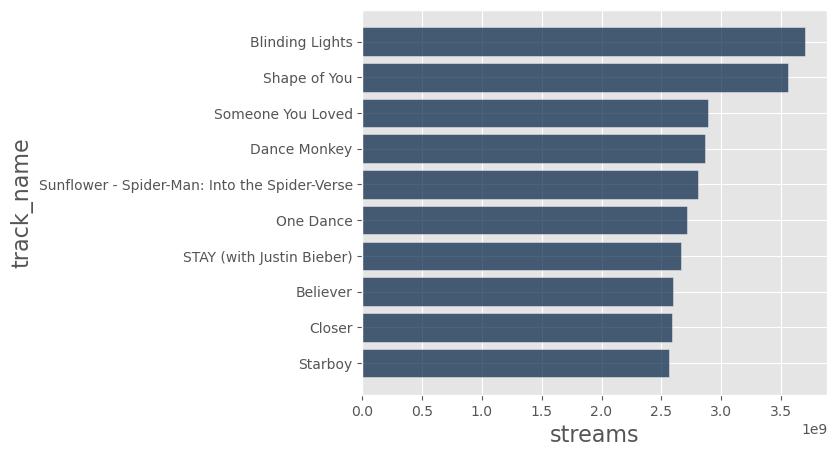

In [5]:
top_10_simple.barh('track_name') # Create a bar chart of streams for each of the songs in `top_10_simple`

In the previous example, we gave you a simplified table with only two columns. What happens if we have more than two columns in a table?

In [6]:
top_10 = Table.read_table('data/spotify-2023-top-10.csv')
top_10

track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,"3,421",20,nan,171,C#,Major,50,38,80,0,0,9,7
Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,0,"6,808",7,0,96,C#,Minor,83,93,65,58,0,9,8
Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,125,"1,800",0,nan,110,C#,Major,50,45,41,75,0,11,3
Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,167,"3,595",6,nan,98,F#,Minor,82,54,59,69,0,18,10
Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,117,843,4,69,90,D,Major,76,91,50,54,0,7,5
One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,107,"3,631",0,26,104,C#,Major,77,36,63,1,0,36,5
STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,99,798,31,0,170,C#,Major,59,48,76,4,0,10,5
Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,121,"2,969",10,31,125,A#,Minor,77,74,78,4,0,23,11
Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,159,"2,179",0,44,95,G#,Major,75,64,52,41,0,11,3
Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,137,"2,445",1,140,186,G,Major,68,49,59,16,0,13,28


If we try to use the same `.barh()` format from above, our cell will cause an error.

In [7]:
top_10.barh('track_name') # This code causes an error

ValueError: The column 'artist(s)_name' contains non-numerical values. A plot cannot be drawn for this column.

Instead, we need to specify a second argument, which tells Python which column to use as the **numerical variable** on the y axis.

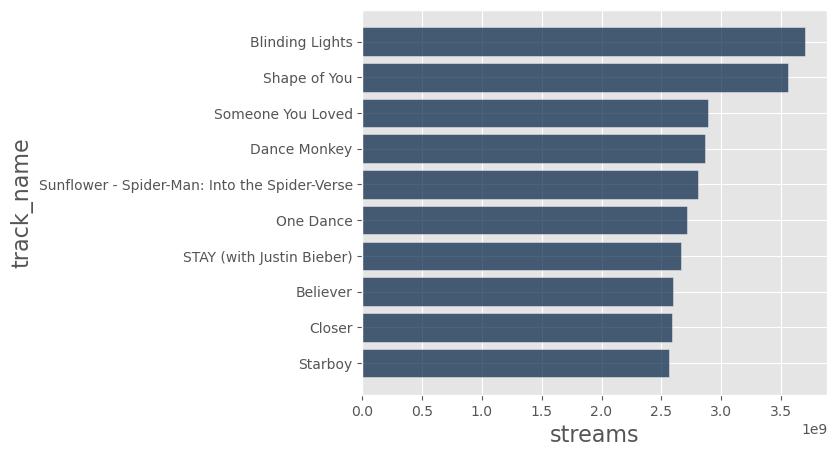

In [8]:
top_10.barh('track_name', 'streams') # Create a bar chart of streams for each of the songs in `top_10`

## `sort`

Sometimes, our bar charts are still hard to understand intuitively because they are in an order that doesn't make sense (or doesn't provide us with much information):

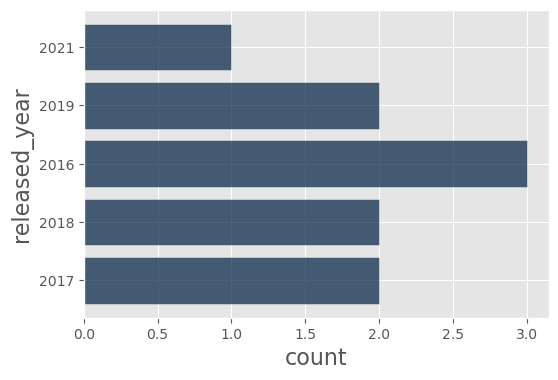

In [9]:
# don't worry about `.group` we'll cover it later in the course
# aggregating our data to count top 10 songs by release year
release_year = top_10.group("released_year").sample(5, with_replacement=False)
release_year.barh('released_year', 'count')

When there is some inherent order to the categories (e.g. the top songs sorted by number of streams or year of release), we can sort the rows first before calling `.barh()` to ensure that the bars in the bar chart are sorted. 

To sort rows in a table, we will use `tbl.sort(column)`. This function takes the argument `column`, which is the name of the column in the table to sort by, and an optional argument `descending` which can either be `True` or `False`, depending on whether we want to sort the table in ascending or descending order.

In [ ]:
release_year.sort('count', descending=True).barh('released_year', 'count')

The code above is the same as the code below! Remember that you can break larger problems up into smaller chunks this way.

In [ ]:
top_10_sorted = release_year.sort('count', descending=True)
top_10_sorted.barh('released_year', 'count')

## `take`

Now, we are going to load in the full table from the Kaggle dataset.

In [ ]:
streams = Table.read_table('data/spotify-2023.csv')
streams

If we try to visualize all 952 songs in one chart, that chart will end up being really long and unwieldy. 

In [ ]:
streams.barh('track_name', 'streams')

So instead, we will manually _take_ the first 10 rows of the table in order to make our visualization. We can accomplish this using the `tbl.take(index)` function, which will take certain rows from the original table based on their index. For right now, we will be using `.take` in this format: `tbl.take(np.arange(10))`, where the number indicates how many rows to take, starting from the top of the table.

In [ ]:
top_10 = streams.take(np.arange(10))
top_10

Now, when we generate our bar chart, we are able to visualize all ten songs very easily.

In [ ]:
top_10.barh('track_name', 'streams')

## Quick Check 1

Given `streams_top_15`, a table of the top 15 most streamed songs, generate a bar chart showing how many streams each artist has.

In [ ]:
streams_top_15 = streams.sort('streams', descending=True).take(np.arange(15)) \
                        .select('artist(s)_name', 'track_name', 'streams')
streams_top_15

In [ ]:
streams_top_15.barh(...) # Create a bar chart showing the artists with the number of streams they have

Notice how the artist The Weeknd has multiple songs in the top 15, but their total streams are not counted together? We will learn how to consolidate all of the songs by a single artist soon...

## Grouping Bars

When two numerical variables have the same scale or magnitude, it is sometimes useful to visualize these variables together. For example, we have a column in `top_10` called `in_spotify_charts`, which is the current spot in the spotify charts of a song. We also have a column `in_apple_charts`, which is the current rank on the apple charts of a song.

In [ ]:
top_10.select('in_spotify_charts', 'track_name', 'in_apple_charts')

In [ ]:
top_10.barh('track_name', 'in_spotify_charts')

In [ ]:
top_10.barh('track_name', 'in_apple_charts')

Since both of these variables have the same scale, we can easily visualize them togther in one bar chart. To do this, we need to make sure our table only has the three columns `in_spotify_charts`, `rank` and `in_apple_charts`. Then we can call `.barh()` to make an overlaid/groupped bar chart.

In [ ]:
top_10.select('in_spotify_charts', 'track_name', 'in_apple_charts').barh('track_name')

If we prefer to visualize these variables separately, we can eliminate the overlay by setting the optional argument `overlay` to `False`.

In [ ]:
top_10.select('in_spotify_charts', 'track_name', 'in_apple_charts').barh('track_name', overlay=False)